<a href="https://colab.research.google.com/github/juliannewman11/optional_build_week/blob/master/Build_week_project_DSPT_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# **Here I began to import my data via CSV**

*   I uploaded the file of my cyber-security data to Github so
*   I could create a URL to avoid run-time issues.




In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/juliannewman11/optional_build_week/master/Cyber%20Security%20Breaches.csv')
print(df.shape)
df.head()

(1055, 14)


,Unnamed: 0,Number,Name_of_Covered_Entity,State,Business_Associate_Involved,Individuals_Affected,Date_of_Breach,Type_of_Breach,Location_of_Breached_Information,Date_Posted_or_Updated,Summary,breach_start,breach_end,year
0,1,0,Brooke Army Medical Center,TX,NaN,1000,10/16/2009,Theft,Paper,2014-06-30,A binder containing the protected health infor...,2009-10-16,NaN,2009
1,2,1,"Mid America Kidney Stone Association, LLC",MO,NaN,1000,9/22/2009,Theft,Network Server,2014-05-30,Five desktop computers containing unencrypted ...,2009-09-22,NaN,2009
2,3,2,Alaska Department of Health and Social Services,AK,NaN,501,10/12/2009,Theft,"Other Portable Electronic Device, Other",2014-01-23,NaN,2009-10-12,NaN,2009
3,4,3,Health Services for Children with Special Need...,DC,NaN,3800,10/9/2009,Loss,Laptop,2014-01-23,A laptop was lost by an employee while in tran...,2009-10-09,NaN,2009
4,5,4,"L. Douglas Carlson, M.D.",CA,NaN,5257,9/27/2009,Theft,Desktop Computer,2014-01-23,A shared Computer that was used for backup was...,2009-09-27,NaN,2009


# In this section I am applying EDA/Cleaning to 
# refine the data to be prepared to graph.

In [0]:
# Replacing the NaNs with an " * "
# To avoid invaild results when running tests
df['breach_end'] = df['breach_end'].fillna('*')

In [0]:
# Replacing the NaNs with an " * "
# To avoid invaild results when running tests
df['Business_Associate_Involved'] = df['Business_Associate_Involved'].fillna('*')

In [0]:
# Using value_counts to understand the variety 
# of cyber attacks 
df['Type_of_Breach'].value_counts()

Theft                                                         516
Unauthorized Access/Disclosure                                148
Other                                                          91
Loss                                                           85
Hacking/IT Incident                                            75
Improper Disposal                                              38
Theft, Unauthorized Access/Disclosure                          26
Theft, Loss                                                    15
Unknown                                                        10
Unauthorized Access/Disclosure, Hacking/IT Incident             9
Unauthorized Access/Disclosure, Other                           8
Loss, Unauthorized Access/Disclosure                            5
Theft, Other                                                    5
Loss, Improper Disposal                                         3
Theft, Unauthorized Access/Disclosure, Hacking/IT Incident      3
Loss, Othe

In [0]:
# Here I am condensing the column to only display
# the breaches that happned 8 or more times 
df1 = df.groupby('Type_of_Breach').filter(lambda x : len(x)>6)

In [0]:
df1["Type_of_Breach"].value_counts()

Theft                                                  516
Unauthorized Access/Disclosure                         148
Other                                                   91
Loss                                                    85
Hacking/IT Incident                                     75
Improper Disposal                                       38
Theft, Unauthorized Access/Disclosure                   26
Theft, Loss                                             15
Unknown                                                 10
Unauthorized Access/Disclosure, Hacking/IT Incident      9
Unauthorized Access/Disclosure, Other                    8
Name: Type_of_Breach, dtype: int64

In [0]:
df1['Breach2'] = df1["Type_of_Breach"].replace(
    ['Unauthorized Access/Disclosure, Other',
     'Unauthorized Access/Disclosure, Hacking/IT Incident'],
     ['Unauthorized Access','Unauthorized Disclosure'] 
     )

In [0]:
df1["Breach2"].value_counts()

Theft                                    516
Unauthorized Access/Disclosure           148
Other                                     91
Loss                                      85
Hacking/IT Incident                       75
Improper Disposal                         38
Theft, Unauthorized Access/Disclosure     26
Theft, Loss                               15
Unknown                                   10
Unauthorized Disclosure                    9
Unauthorized Access                        8
Name: Breach2, dtype: int64

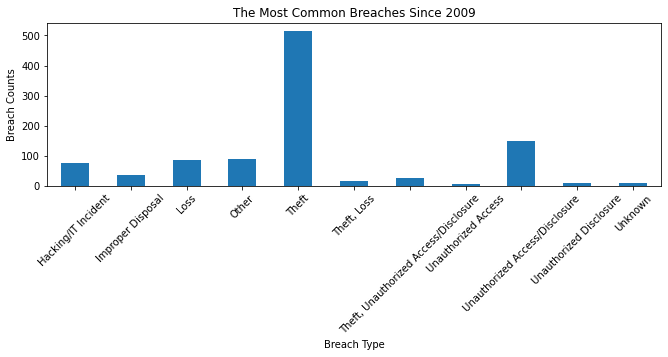

In [0]:
df1['Breach2'].value_counts().sort_index().plot.bar(figsize=(11,3))
plt.xticks(rotation=45)
plt.xlabel("Breach Type")
plt.ylabel('Breach Counts')
plt.title('The Most Common Breaches Since 2009');


In [0]:
df1['Affected2'] = df1['Individuals_Affected']/100

In [0]:
df1= df1[df1['Affected2'] <= 905]


In [0]:
df1['Affected2'].describe()

count    986.000000
mean      61.448905
std      113.457621
min        5.000000
25%        9.552500
50%       21.655000
75%       58.472500
max      840.000000
Name: Affected2, dtype: float64

In [0]:
fig = go.Figure(data=go.Choropleth(
    locations=df['State'], # Spatial coordinates
    z = df1['Individuals_Affected'], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Millions USD",
))

fig.update_layout(
    title_text = 'Number of Cyber Security Breaches Across The U.S',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [0]:
df1["Date_of_Breach"].value_counts(all)

1/11/2012     0.007099
6/24/2011     0.007099
3/10/2011     0.006085
9/20/2013     0.006085
9/27/2009     0.006085
                ...   
6/14/2011     0.001014
9/13/2013     0.001014
8/10/2010     0.001014
8/3/2010      0.001014
12/24/2012    0.001014
Name: Date_of_Breach, Length: 752, dtype: float64